<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/UAS/Chapter%2005/05_SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 2. Load & Pilih Fitur Dataset Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # ambil sepal length dan width
y = iris.target

In [3]:
# 3. Split dan Normalisasi Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# 4. Training Model SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [5]:
# 5. Evaluasi Model
y_pred = svm.predict(X_test)
print("Akurasi:", svm.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Akurasi: 0.6888888888888889
[[15  0  0]
 [ 0  9  6]
 [ 0  8  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.53      0.60      0.56        15
   virginica       0.54      0.47      0.50        15

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45



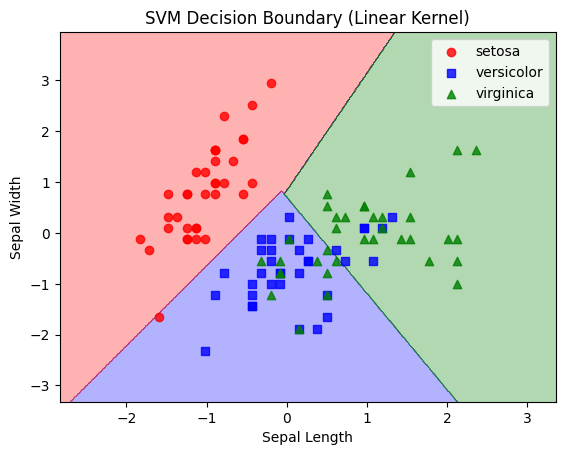

In [6]:
# 6. Visualisasi Decision Boundary
def plot_decision_boundary(X, y, model):
    from matplotlib.colors import ListedColormap

    markers = ('o', 's', '^')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))

    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y == cl, 0], X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=iris.target_names[cl])
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.title('SVM Decision Boundary (Linear Kernel)')
    plt.show()

plot_decision_boundary(X_train, y_train, svm)